In [37]:
import json
f = open("challenge_set.json")
js = f.read()
challenge_set = json.loads(js)
f.close()

In [38]:
# challenge_set categories
# 1. Predict tracks for a playlist given its title only
# 2. Predict tracks for a playlist given its title and the first track
# 3. Predict tracks for a playlist given its title and the first 5 tracks
# 4. Predict tracks for a playlist given its first 5 tracks (no title)
# 5. Predict tracks for a playlist given its title and the first 10 tracks
# 6. Predict tracks for a playlist given its first ten tracks (no title)
# 7. Predict tracks for a playlist given its title and the first 25 tracks
# 8. Predict tracks for a playlist given its title and 25 random tracks
# 9. Predict tracks for a playlist given its title and the first 100 tracks
# 10.Predict tracks for a playlist given its title and 100 random tracks
categories = {"cat1":{}, "cat2":{}, "cat3":{}, "cat4":{}, "cat5":{},
              "cat6":{}, "cat7":{}, "cat8":{}, "cat9":{}, "cat10":{}
             }

In [39]:
for playlist in challenge_set['playlists']:
    title = 'name' in playlist.keys()
    ntracks = playlist['num_tracks']
    nsamples = playlist['num_samples']
    pid = playlist['pid']
    poslist = []
    
    for track in playlist['tracks']:
        pos = track['pos']
        poslist.append(pos)
    
    if title:
        # cat1
        if nsamples == 0:
            categories['cat1'][pid] = ntracks
        # cat2
        if nsamples == 1:
            categories['cat2'][pid] = ntracks
        # cat3
        if nsamples == 5:
            categories['cat3'][pid] = ntracks
        # cat5
        if nsamples == 10:
            categories['cat5'][pid] = ntracks
        # cat7 or cat8
        if nsamples == 25:
            # cat7
            if max(poslist) < nsamples:
                categories['cat7'][pid] = ntracks
            else:
            # cat8
                categories['cat8'][pid] = ntracks
        # cat9 or cat10
        if nsamples == 100:
            # cat9
            if max(poslist) < nsamples:
                categories['cat9'][pid] = ntracks
            # cat10
            else:
                categories['cat10'][pid] = ntracks
    else:
        # cat4
        if nsamples == 5:
            categories['cat4'][pid] = ntracks
        # cat6
        if nsamples == 10:
            categories['cat6'][pid] = ntracks
    

In [40]:
# How many playlist in each category?
for i in range(1, 11):
    cate = "cat" + str(i)
    keys = categories[cate].keys()
    num = 0
    for key in keys:
        num = num + 1
    print(cate + " has " + str(num) + " playlists\n")

cat1 has 1000 playlists

cat2 has 1000 playlists

cat3 has 1000 playlists

cat4 has 1000 playlists

cat5 has 1000 playlists

cat6 has 1000 playlists

cat7 has 1000 playlists

cat8 has 1000 playlists

cat9 has 1000 playlists

cat10 has 1000 playlists



In [41]:
import matplotlib.pyplot as plt

cat1 = categories['cat1']
plt.bar(range(len(cat1)), cat1.values(), align='center')


<BarContainer object of 1000 artists>

In [42]:
# challenge_set categories
# 1. Predict tracks for a playlist given its title only
# 2. Predict tracks for a playlist given its title and the first track
# 3. Predict tracks for a playlist given its title and the first 5 tracks
# 4. Predict tracks for a playlist given its first 5 tracks (no title)
# 5. Predict tracks for a playlist given its title and the first 10 tracks
# 6. Predict tracks for a playlist given its first ten tracks (no title)
# 7. Predict tracks for a playlist given its title and the first 25 tracks
# 8. Predict tracks for a playlist given its title and 25 random tracks
# 9. Predict tracks for a playlist given its title and the first 100 tracks
# 10.Predict tracks for a playlist given its title and 100 random tracks
for i in range(1,11):
    cate = "cat" + str(i)
    max_ntracks = max(categories[cate].values())
    min_ntracks = min(categories[cate].values())
    print("num_tracks in " + cate + ": [ " + str(min_ntracks) + ", " + str(max_ntracks) + " ]")

num_tracks in cat1: [ 10, 50 ]
num_tracks in cat2: [ 10, 78 ]
num_tracks in cat3: [ 10, 100 ]
num_tracks in cat4: [ 40, 100 ]
num_tracks in cat5: [ 40, 100 ]
num_tracks in cat6: [ 40, 100 ]
num_tracks in cat7: [ 101, 250 ]
num_tracks in cat8: [ 101, 250 ]
num_tracks in cat9: [ 150, 250 ]
num_tracks in cat10: [ 150, 250 ]


In [43]:
# iterate over MPD in order to collect info

# MPD categories, correspond to challenge_set categories
cates = {"c1":{}, "c2":{}, "c3":{}, "c4_6":{}, "c5":{}, "c7_8":{}, "c9_10":{}}

for i in range(0,1000):
    start = i * 1000
    end = start + 999
    path = "data/mpd.slice." + str(start) + "-" + str(end) + ".json"
    f = open(path)
    js = f.read()
    mdp_slice = json.loads(js)
    f.close()
    
    for playlist in mdp_slice['playlists']:
        title = 'name' in playlist.keys()
        pid = playlist['pid']
        ntracks = playlist['num_tracks']
        
        # c1, c2, c3, c4_6, c5, c7_8, c9_10
        if title:
            # c1
            if ntracks > 9 and ntracks < 51:
                 cates['c1'][pid] = ntracks
            # c2
            if ntracks > 9 and ntracks < 79:
                 cates['c2'][pid] = ntracks
            # c3
            if ntracks > 9 and ntracks < 101:
                 cates['c3'][pid] = ntracks
            # c4_6, c5
            if ntracks > 39 and ntracks < 101:
                 cates['c5'][pid] = ntracks
                 cates['c4_6'][pid] = ntracks
            # c7_8
            if ntracks > 100 and ntracks < 251:
                 cates['c7_8'][pid] = ntracks
            # c9_10
            if ntracks > 149 and ntracks < 251:
                 cates['c9_10'][pid] = ntracks          
        else:
            # c4_6
            if ntracks > 39 and ntracks < 101:
                 cates['c4_6'][pid] = ntracks
    print("slice " + str(i) + " finished")

slice 0 finished
slice 1 finished
slice 2 finished
slice 3 finished
slice 4 finished
slice 5 finished
slice 6 finished
slice 7 finished
slice 8 finished
slice 9 finished
slice 10 finished
slice 11 finished
slice 12 finished
slice 13 finished
slice 14 finished
slice 15 finished
slice 16 finished
slice 17 finished
slice 18 finished
slice 19 finished
slice 20 finished
slice 21 finished
slice 22 finished
slice 23 finished
slice 24 finished
slice 25 finished
slice 26 finished
slice 27 finished
slice 28 finished
slice 29 finished
slice 30 finished
slice 31 finished
slice 32 finished
slice 33 finished
slice 34 finished
slice 35 finished
slice 36 finished
slice 37 finished
slice 38 finished
slice 39 finished
slice 40 finished
slice 41 finished
slice 42 finished
slice 43 finished
slice 44 finished
slice 45 finished
slice 46 finished
slice 47 finished
slice 48 finished
slice 49 finished
slice 50 finished
slice 51 finished
slice 52 finished
slice 53 finished
slice 54 finished
slice 55 finished
sl

slice 437 finished
slice 438 finished
slice 439 finished
slice 440 finished
slice 441 finished
slice 442 finished
slice 443 finished
slice 444 finished
slice 445 finished
slice 446 finished
slice 447 finished
slice 448 finished
slice 449 finished
slice 450 finished
slice 451 finished
slice 452 finished
slice 453 finished
slice 454 finished
slice 455 finished
slice 456 finished
slice 457 finished
slice 458 finished
slice 459 finished
slice 460 finished
slice 461 finished
slice 462 finished
slice 463 finished
slice 464 finished
slice 465 finished
slice 466 finished
slice 467 finished
slice 468 finished
slice 469 finished
slice 470 finished
slice 471 finished
slice 472 finished
slice 473 finished
slice 474 finished
slice 475 finished
slice 476 finished
slice 477 finished
slice 478 finished
slice 479 finished
slice 480 finished
slice 481 finished
slice 482 finished
slice 483 finished
slice 484 finished
slice 485 finished
slice 486 finished
slice 487 finished
slice 488 finished
slice 489 fi

slice 869 finished
slice 870 finished
slice 871 finished
slice 872 finished
slice 873 finished
slice 874 finished
slice 875 finished
slice 876 finished
slice 877 finished
slice 878 finished
slice 879 finished
slice 880 finished
slice 881 finished
slice 882 finished
slice 883 finished
slice 884 finished
slice 885 finished
slice 886 finished
slice 887 finished
slice 888 finished
slice 889 finished
slice 890 finished
slice 891 finished
slice 892 finished
slice 893 finished
slice 894 finished
slice 895 finished
slice 896 finished
slice 897 finished
slice 898 finished
slice 899 finished
slice 900 finished
slice 901 finished
slice 902 finished
slice 903 finished
slice 904 finished
slice 905 finished
slice 906 finished
slice 907 finished
slice 908 finished
slice 909 finished
slice 910 finished
slice 911 finished
slice 912 finished
slice 913 finished
slice 914 finished
slice 915 finished
slice 916 finished
slice 917 finished
slice 918 finished
slice 919 finished
slice 920 finished
slice 921 fi

([<matplotlib.axis.XTick at 0x294b38534e0>,
 <a list of 7 Text xticklabel objects>)

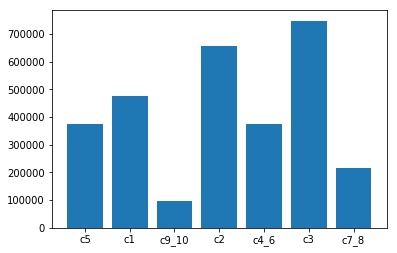

In [44]:
# count number of playlists suitable for each category
count = {}
count['c1'] = len(cates['c1'].keys())
count['c2'] = len(cates['c2'].keys())
count['c3'] = len(cates['c3'].keys())
count['c4_6'] = len(cates['c4_6'].keys())
count['c5'] = len(cates['c5'].keys())
count['c7_8'] = len(cates['c7_8'].keys())
count['c9_10'] = len(cates['c9_10'].keys())
plt.bar(range(len(count)), count.values(), align='center')
plt.xticks(range(len(count)), list(count.keys()))

In [45]:
print(count)

{'c5': 374561, 'c1': 476438, 'c9_10': 97256, 'c2': 656868, 'c4_6': 374561, 'c3': 747510, 'c7_8': 216481}


In [46]:
import pickle
# dump cates into 'mydata/cates.txt'
with open("mydata/cates.txt","wb") as dump_f:
    pickle.dump(cates,dump_f)